# Task 5: Train-Test Split & Evaluation Metrics
Heart Disease Dataset

In [1]:

import pandas as pd
df = pd.read_csv("Dataset Heart Disease.csv")
df.head()


,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


This code loads the Heart Disease dataset into a DataFrame for model building.

In [2]:

X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]


This separates independent features (X) and the target variable (y).

In [3]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


This splits the dataset into training and testing sets to evaluate model performance on unseen data.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=5000)
model.fit(X_scaled, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


This trains a Logistic Regression model using the training data.

In [5]:

y_pred = model.predict(X_test)


This generates predictions using the trained model on test data.

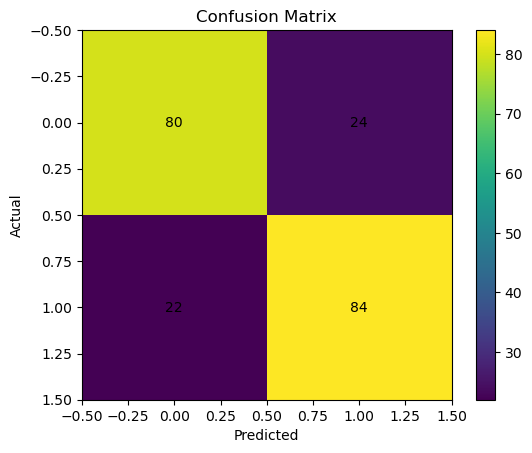

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


Accuracy measures overall correctness, precision measures correct positive predictions, and recall measures how many actual positives are correctly identified.

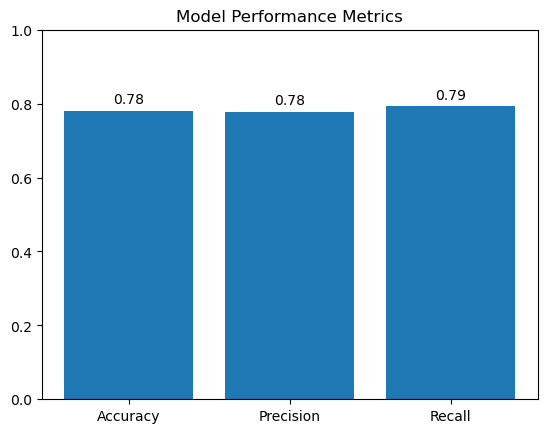

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

metrics = ["Accuracy", "Precision", "Recall"]
values = [accuracy, precision, recall]

plt.figure()
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Model Performance Metrics")

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.show()

The confusion matrix shows True Positives, True Negatives, False Positives, and False Negatives, helping evaluate classification errors in detail.


## Interpretation
- High accuracy indicates good overall performance.
- High precision means fewer false positives.
- High recall means fewer false negatives.
- Confusion matrix helps understand exact prediction errors.
